# Macroeconomic Analysis of Ghana

## Questions
- Is stabilization broad based across inflation, monetary policy, exchange rate, reserves, and real GDP?
- Did policy easing lag disinflation?
- How did the cedi stabilize as reserves improved?
- Did growth strengthen with improved external conditions?
- Are IMF disbursements and commodities linked to FX and macro stability?
-  

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", context="talk")

In [190]:
df = pd.read_csv("../data/processed/ghana_macroecon_ds.csv")

In [191]:
df = df.rename(columns={"Unnamed: 0": "Date"})

In [192]:
df.set_index("Date", inplace=True)

In [193]:
df.head()

,m2_plus,m2,m1,private_credit,policy_rate,interbank_rate,lending_rate,inflation_headline,inflation_food,inflation_nonfood,...,fx_dep_m,fx_dep_12m,reserves_net_change_12m,reserves_months_imports,npl_change,capital_adequacy_gap,Unemployment Rate,Buying,Selling,mid_fx
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-01,4.75726,3.70662,2.13430,2.73050,12.50,11.71,24.25,10.41,10.03,10.69,...,NaN,NaN,NaN,NaN,NaN,5.01,5.09,0.9230,0.9345,0.9288
2007-10-01,5.13003,4.11015,2.61923,3.04774,12.50,12.44,24.25,10.14,8.81,11.11,...,1.038943,NaN,NaN,NaN,-0.24,4.90,5.09,0.9316,0.9453,0.9385
2008-02-01,5.75847,4.58013,2.71302,3.42766,13.50,12.02,24.17,13.21,11.23,14.68,...,3.218813,NaN,NaN,NaN,1.86,4.86,5.14,0.9579,0.9804,0.9692
2008-04-01,6.01074,4.75626,2.78303,3.64642,14.25,12.56,24.35,15.29,13.15,16.90,...,0.576133,NaN,NaN,NaN,0.27,4.49,5.14,0.9643,0.9853,0.9748
2008-08-01,6.69486,4.98611,2.86586,4.30304,17.00,17.39,24.08,18.10,17.56,18.50,...,8.868553,NaN,NaN,NaN,-1.35,4.32,5.14,1.0459,1.0844,1.0652


In [194]:
df.columns

Index(['m2_plus', 'm2', 'm1', 'private_credit', 'policy_rate',
       'interbank_rate', 'lending_rate', 'inflation_headline',
       'inflation_food', 'inflation_nonfood', 'trade_balance_usd',
       'exports_usd', 'imports_usd', 'gross_reserves_usd', 'net_reserves_usd',
       'capital_adequacy', 'npl_ratio', 'cieg_real_growth', 'cieg_real_level',
       'm2_plus_yoy', 'private_credit_yoy', 'Year', 'real_policy_rate',
       'real_interbank_rate', 'real_lending_rate', 'd_policy_rate',
       'd_inflation', 'inflation_lag1', 'policy_rate_lag1', 'log_m2_plus',
       'log_credit', 'private_credit_real_yoy', 'fx_log', 'fx_dep_m',
       'fx_dep_12m', 'reserves_net_change_12m', 'reserves_months_imports',
       'npl_change', 'capital_adequacy_gap', 'Unemployment Rate', 'Buying',
       'Selling', 'mid_fx'],
      dtype='object')

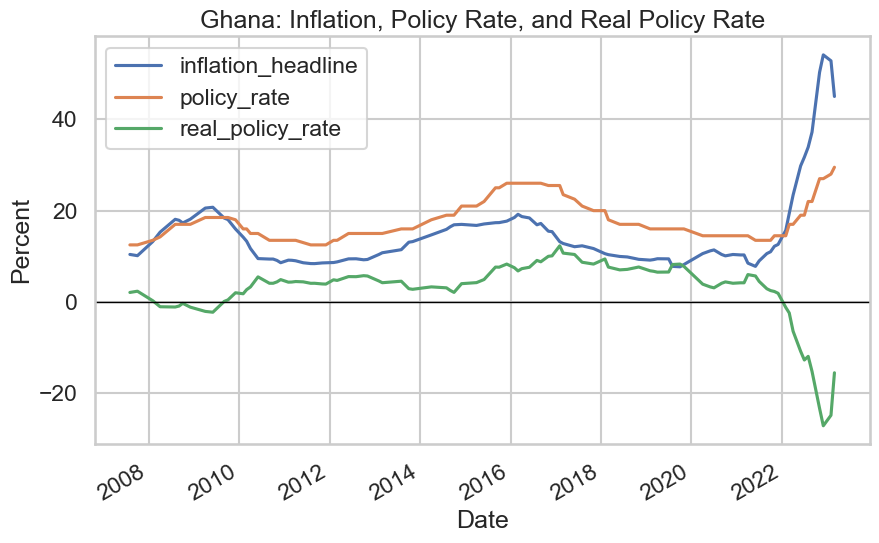

In [239]:
df[["inflation_headline", "policy_rate", "real_policy_rate"]].dropna().plot(
    figsize=(10,6)
)
plt.axhline(0, color="black", linewidth=1) 
plt.ylabel("Percent")
plt.title("Ghana: Inflation, Policy Rate, and Real Policy Rate")
plt.savefig("../figures/slides/inflationPolicyRateRealPolicyRate.png")
plt.show()

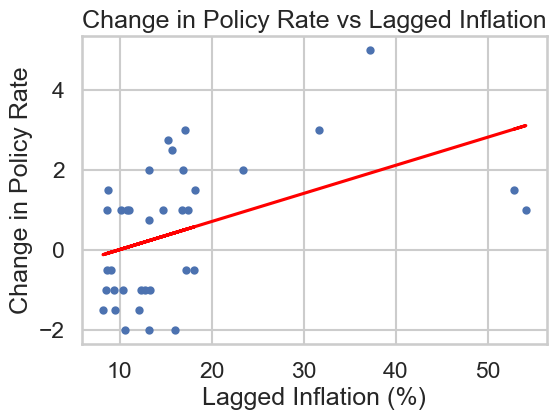

In [240]:
moves = df[df["d_policy_rate"].abs() > 0.05]
moves.plot.scatter(x="inflation_lag1", y="d_policy_rate", figsize=(6,4))
plt.ylabel("Change in Policy Rate")
plt.xlabel("Lagged Inflation (%)")
plt.title("Change in Policy Rate vs Lagged Inflation")
x = moves["inflation_lag1"]
m, b = np.polyfit(x, moves["d_policy_rate"], 1)
plt.plot(x, m*x + b, color='red', label='Regression Line')
plt.savefig("../figures/slides/ChangePolicyRateVsLaggedInflationScatter.png")

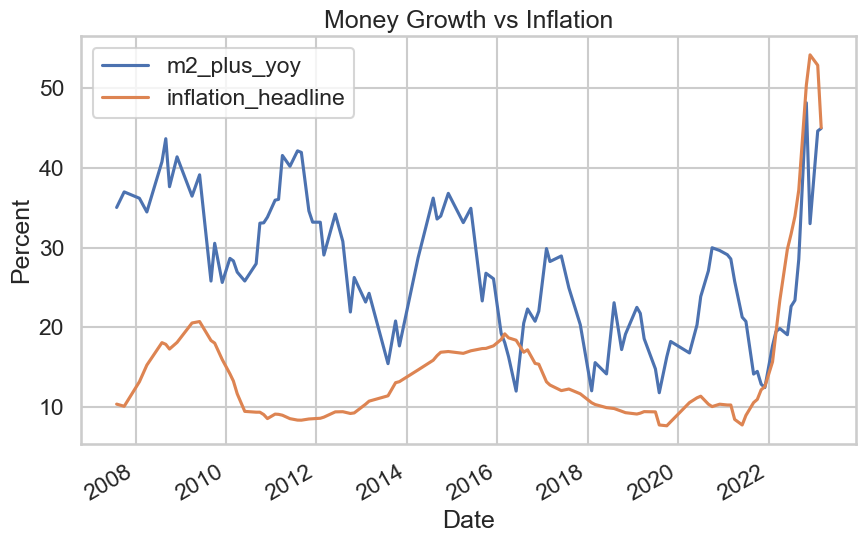

In [241]:
df[["m2_plus_yoy", "inflation_headline"]].dropna().plot(figsize=(10,6))
plt.ylabel("Percent")
plt.title("Money Growth vs Inflation")
plt.savefig("../figures/slides/MoneyGrowthVsInflationTimeSeries.png")

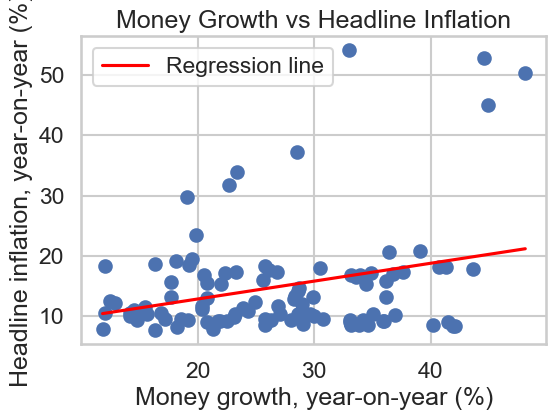

In [242]:
df_xy = df[["m2_plus_yoy", "inflation_headline"]].dropna()

fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(df_xy["m2_plus_yoy"], df_xy["inflation_headline"])

ax.set_xlabel("Money growth, year-on-year (%)")
ax.set_ylabel("Headline inflation, year-on-year (%)")
ax.set_title("Money Growth vs Headline Inflation")

x = df_xy["m2_plus_yoy"].values
y = df_xy["inflation_headline"].values

m, b = np.polyfit(x, y, 1)

xs = np.linspace(x.min(), x.max(), 100)
ax.plot(xs, m*xs + b, color="red", label="Regression line")

ax.legend()
plt.savefig("../figures/slides/MoneyGrowthVsInflationScatter.png")

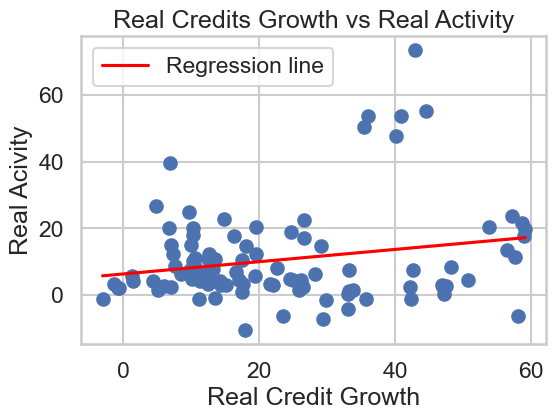

In [243]:
df_xy = df[["private_credit_yoy", "cieg_real_growth"]].dropna()

fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(df_xy["private_credit_yoy"], df_xy["cieg_real_growth"])

ax.set_xlabel("Real Credit Growth")
ax.set_ylabel("Real Acivity")
ax.set_title("Real Credits Growth vs Real Activity")

x = df_xy["private_credit_yoy"].values
y = df_xy["cieg_real_growth"].values

m, b = np.polyfit(x, y, 1)

xs = np.linspace(x.min(), x.max(), 100)
ax.plot(xs, m*xs + b, color="red", label="Regression line")

ax.legend()
plt.savefig("../figures/slides/RealCreditGrowthVsRealActivity.png")

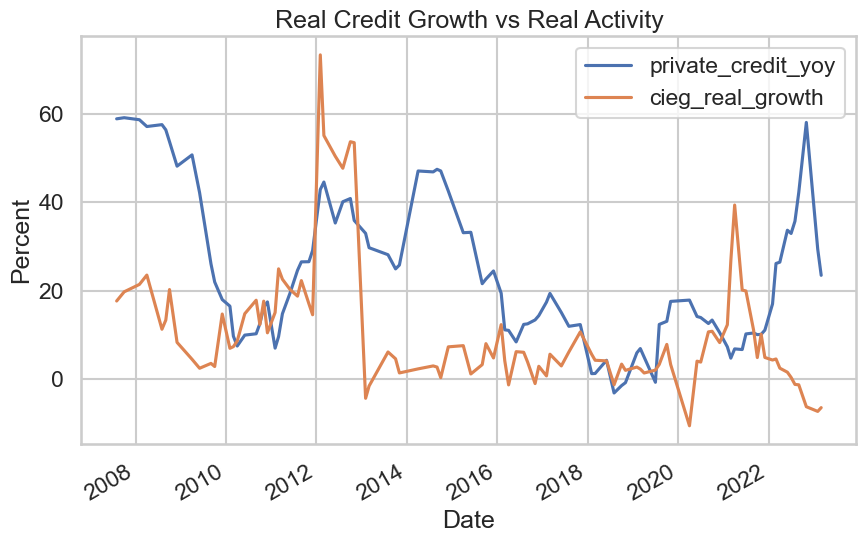

In [244]:
df[["private_credit_yoy", "cieg_real_growth"]].dropna().plot(figsize=(10,6))
plt.ylabel("Percent")
plt.title("Real Credit Growth vs Real Activity")
plt.savefig("../figures/slides/RealCreditGrowthVsRealActivity.png")

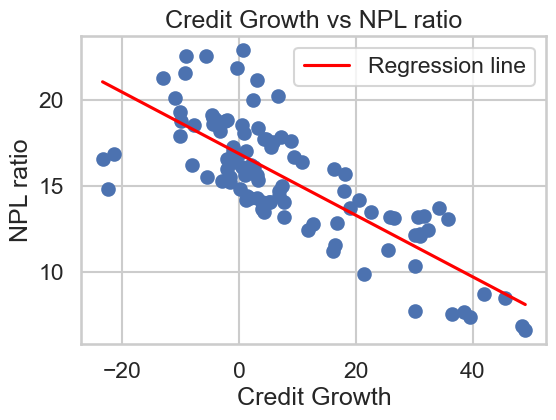

In [245]:
df_xy = df[["private_credit_real_yoy", "npl_ratio"]].dropna()

fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(df_xy["private_credit_real_yoy"], df_xy["npl_ratio"])

ax.set_xlabel("Credit Growth")
ax.set_ylabel("NPL ratio")
ax.set_title("Credit Growth vs NPL ratio")

x = df_xy["private_credit_real_yoy"].values
y = df_xy["npl_ratio"].values

m, b = np.polyfit(x, y, 1)

xs = np.linspace(x.min(), x.max(), 100)
ax.plot(xs, m*xs + b, color="red", label="Regression line")

ax.legend()
plt.savefig("../figures/slides/CreditGrowthVsNPLratioScatter.png")

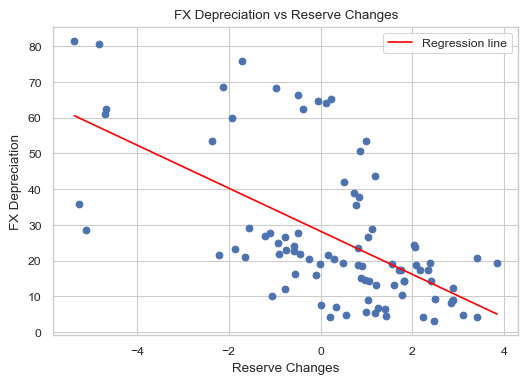

In [202]:
df_xy = df[["reserves_net_change_12m", "fx_dep_12m"]].dropna()

fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(df_xy["reserves_net_change_12m"], df_xy["fx_dep_12m"])

ax.set_xlabel("Reserve Changes")
ax.set_ylabel("FX Depreciation")
ax.set_title("FX Depreciation vs Reserve Changes")

x = df_xy["reserves_net_change_12m"].values
y = df_xy["fx_dep_12m"].values

m, b = np.polyfit(x, y, 1)

xs = np.linspace(x.min(), x.max(), 100)
ax.plot(xs, m*xs + b, color="red", label="Regression line")

ax.legend()
plt.savefig("../figures/analysis/FXDepreciationVsReserveChangesScatter.png")

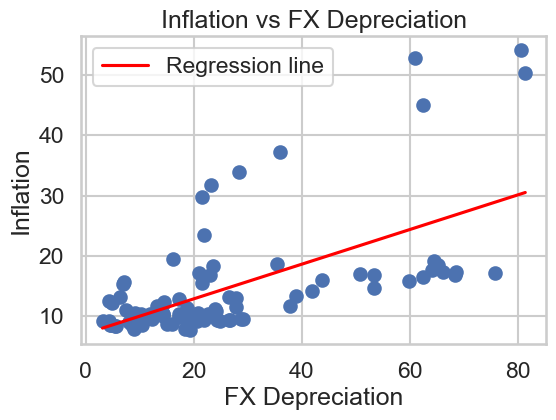

In [246]:
df_xy = df[["fx_dep_12m", "inflation_headline"]].dropna()

fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(df_xy["fx_dep_12m"], df_xy["inflation_headline"])

ax.set_xlabel("FX Depreciation")
ax.set_ylabel("Inflation")
ax.set_title("Inflation vs FX Depreciation")

x = df_xy["fx_dep_12m"].values
y = df_xy["inflation_headline"].values

m, b = np.polyfit(x, y, 1)

xs = np.linspace(x.min(), x.max(), 100)
ax.plot(xs, m*xs + b, color="red", label="Regression line")

ax.legend()
plt.savefig("../figures/slides/InflationVsFXDepreciationScatter.png")

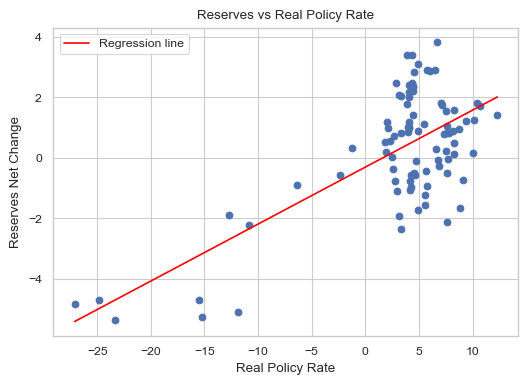

In [204]:
df_xy = df[["real_policy_rate", "reserves_net_change_12m"]].dropna()

fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(df_xy["real_policy_rate"], df_xy["reserves_net_change_12m"])

ax.set_xlabel("Real Policy Rate")
ax.set_ylabel("Reserves Net Change")
ax.set_title("Reserves vs Real Policy Rate")

x = df_xy["real_policy_rate"].values
y = df_xy["reserves_net_change_12m"].values

m, b = np.polyfit(x, y, 1)

xs = np.linspace(x.min(), x.max(), 100)
ax.plot(xs, m*xs + b, color="red", label="Regression line")

ax.legend()
plt.savefig("../figures/analysis/ReservesVsRealPolicyRateScatter.png")

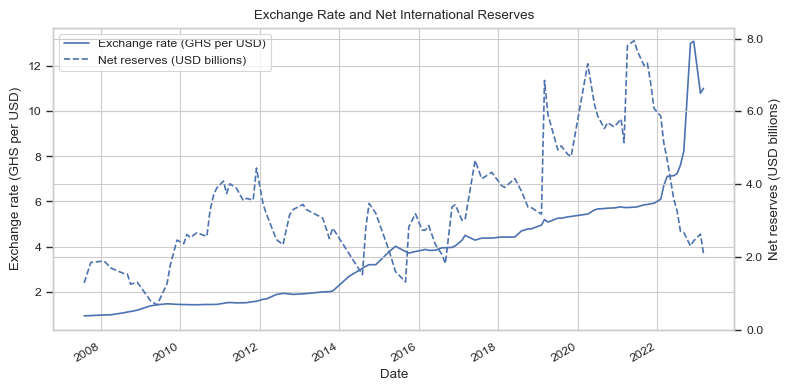

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# data (assumes mid_fx = GHS per USD, net_reserves_usd already in USD billions)
df_xy = df[["mid_fx", "net_reserves_usd"]].dropna().copy()
df_xy.index = pd.to_datetime(df_xy.index)

fig, ax1 = plt.subplots(figsize=(8, 4))

# LEFT AXIS: exchange rate
ax1.plot(df_xy.index, df_xy["mid_fx"], label="Exchange rate (GHS per USD)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Exchange rate (GHS per USD)")
ax1.set_title("Exchange Rate and Net International Reserves")

# nice yearly ticks
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
fig.autofmt_xdate()

# RIGHT AXIS: reserves (already in billions)
reserves_bil = df_xy["net_reserves_usd"]  # e.g. 0.7–7.9

ax2 = ax1.twinx()
ax2.plot(df_xy.index, reserves_bil, linestyle="--",
         label="Net reserves (USD billions)")
ax2.set_ylabel("Net reserves (USD billions)")

# y-ticks on right axis
ymin, ymax = reserves_bil.min(), reserves_bil.max()
ticks = np.linspace(np.floor(ymin), np.ceil(ymax), 5)
ax2.set_yticks(ticks)
ax2.set_yticklabels([f"{t:.1f}" for t in ticks])

# grid + legend
ax1.grid(True, axis="y")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper left")

plt.tight_layout()
plt.savefig("../figures/analysis/FXvsReservesDualAxis.png", dpi=300)
plt.show()


<Axes: title={'center': '12m FX depreciation (%)'}, xlabel='Date'>

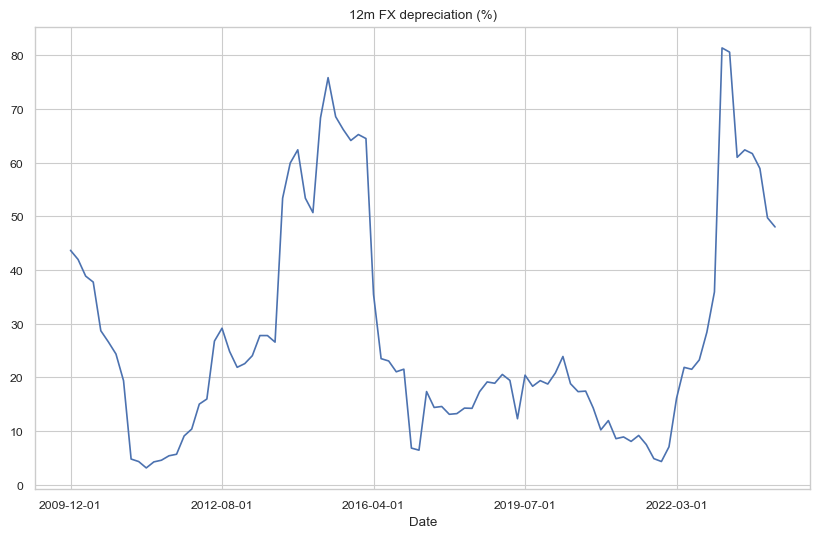

In [206]:
df["fx_dep_12m"].dropna().plot(figsize=(10,6), title="12m FX depreciation (%)")

Text(0, 0.5, 'Net reserves (USD)')

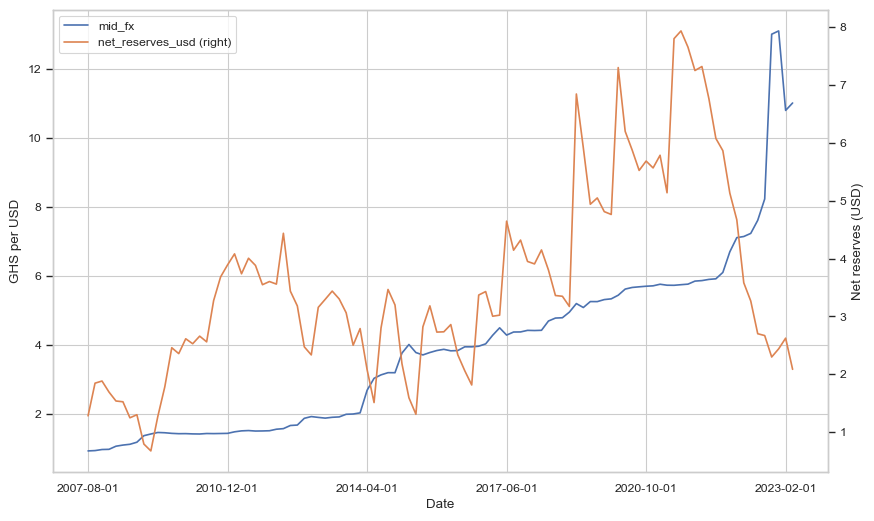

In [207]:
ax = df[["mid_fx", "net_reserves_usd"]].dropna().plot(
    secondary_y="net_reserves_usd", figsize=(10,6)
)
ax.set_ylabel("GHS per USD")
ax.right_ax.set_ylabel("Net reserves (USD)")

<Axes: xlabel='reserves_net_change_12m', ylabel='fx_dep_12m'>

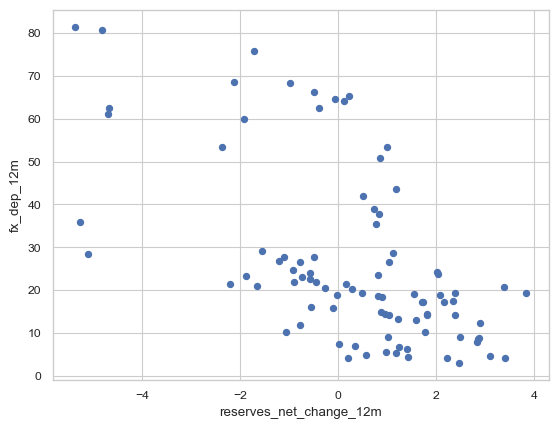

In [208]:
tmp = df[["fx_dep_12m", "reserves_net_change_12m"]].dropna()
tmp.plot.scatter(x="reserves_net_change_12m", y="fx_dep_12m")

<Axes: title={'center': 'Reserves in months of imports'}, xlabel='Date'>

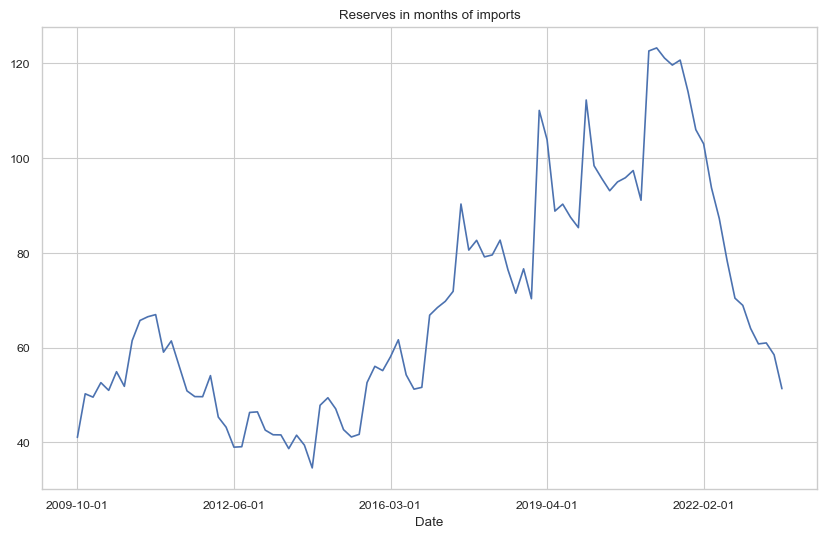

In [209]:
df["reserves_months_imports"].dropna().plot(figsize=(10,6),
    title="Reserves in months of imports")

<Axes: xlabel='Date'>

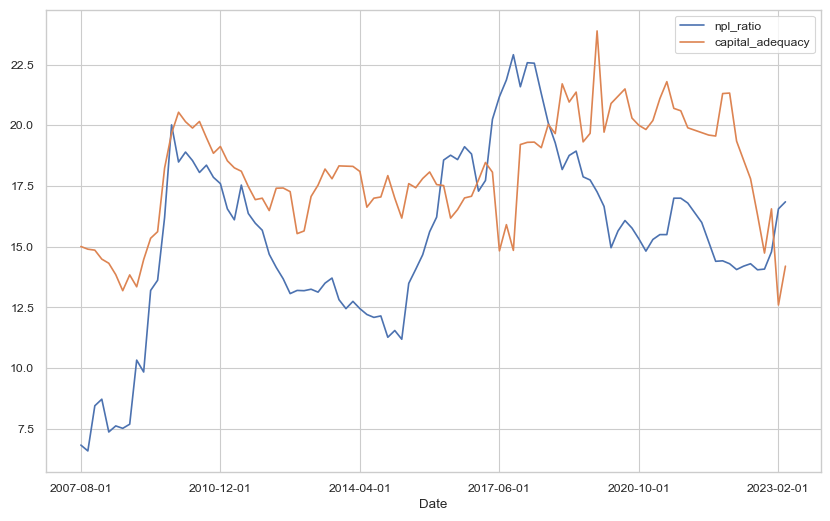

In [210]:
df[["npl_ratio", "capital_adequacy"]].dropna().plot(figsize=(10,6))

<Axes: title={'center': 'Capital adequacy above regulatory minimum'}, xlabel='Date'>

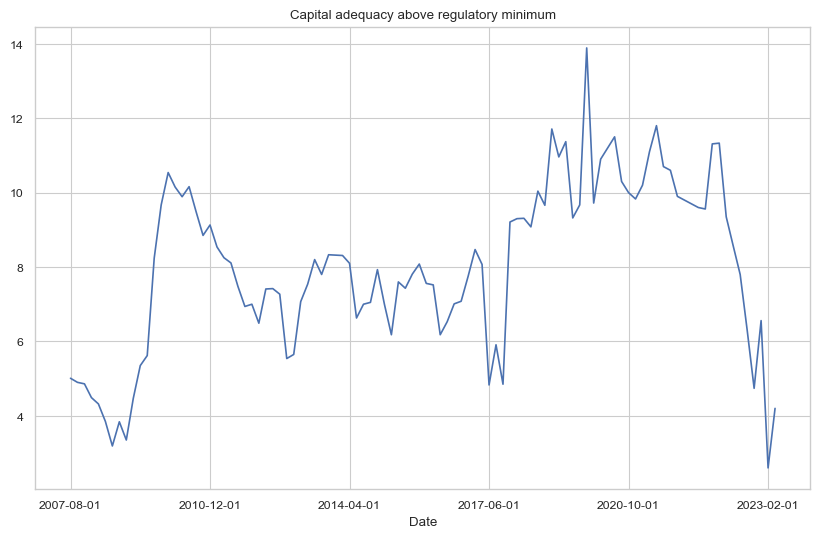

In [211]:
df["capital_adequacy_gap"].dropna().plot(figsize=(10,6),
    title="Capital adequacy above regulatory minimum")

<Axes: xlabel='private_credit_yoy', ylabel='npl_ratio'>

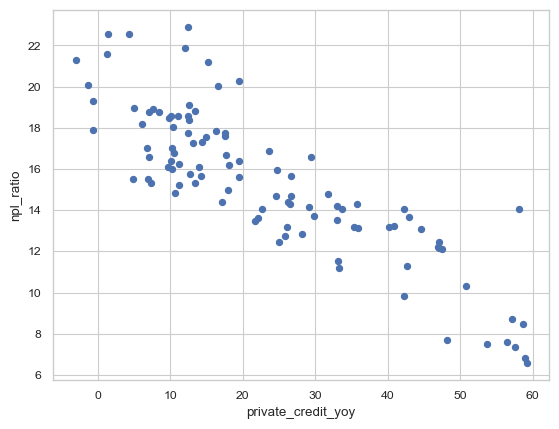

In [212]:
tmp = df[["private_credit_yoy", "npl_ratio"]].dropna()
tmp.plot.scatter(x="private_credit_yoy", y="npl_ratio")

<Axes: xlabel='Date'>

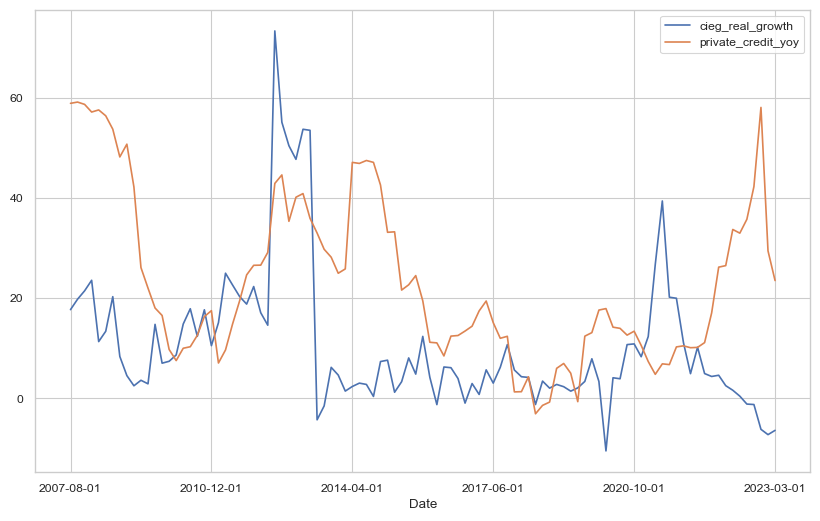

In [213]:
df[["cieg_real_growth", "private_credit_yoy"]].dropna().plot(figsize=(10,6))

<Axes: xlabel='Date'>

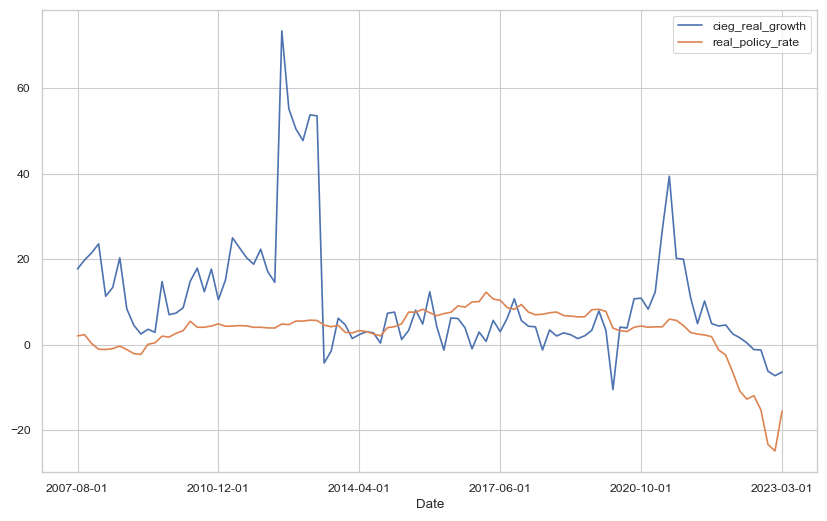

In [214]:
df[["cieg_real_growth", "real_policy_rate"]].dropna().plot(figsize=(10,6))

<Axes: xlabel='cieg_real_growth', ylabel='Unemployment Rate'>

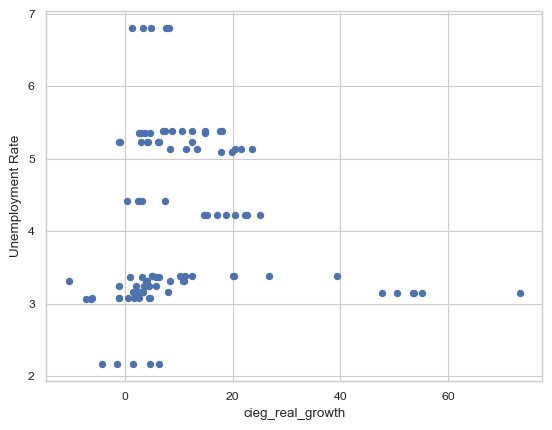

In [215]:
tmp = df[["Unemployment Rate", "cieg_real_growth"]].dropna()
tmp.plot.scatter(x="cieg_real_growth", y="Unemployment Rate")

In [216]:
cols = [
    "inflation_headline", "policy_rate", "real_policy_rate",
    "m2_plus_yoy", "private_credit_yoy", "private_credit_real_yoy",
    "cieg_real_growth", "fx_dep_12m", "reserves_net_change_12m",
    "npl_ratio"
]

corr = df[cols].dropna().corr()
corr


,inflation_headline,policy_rate,real_policy_rate,m2_plus_yoy,private_credit_yoy,private_credit_real_yoy,cieg_real_growth,fx_dep_12m,reserves_net_change_12m,npl_ratio
inflation_headline,1.000000,0.660324,-0.854668,0.278768,0.421534,-0.237564,-0.395894,0.559421,-0.763312,-0.192469
policy_rate,0.660324,1.000000,-0.174468,0.019980,0.147189,-0.297367,-0.432041,0.601715,-0.496655,0.095584
real_policy_rate,-0.854668,-0.174468,1.000000,-0.351699,-0.450947,0.105908,0.220402,-0.317513,0.657480,0.318439
m2_plus_yoy,0.278768,0.019980,-0.351699,1.000000,0.475699,0.317464,0.213254,0.275578,-0.198301,-0.294801
private_credit_yoy,0.421534,0.147189,-0.450947,0.475699,1.000000,0.780711,0.196442,0.491106,-0.576216,-0.755567
private_credit_real_yoy,-0.237564,-0.297367,0.105908,0.317464,0.780711,1.000000,0.483242,0.140568,-0.091234,-0.676726
cieg_real_growth,-0.395894,-0.432041,0.220402,0.213254,0.196442,0.483242,1.000000,-0.260191,0.161041,-0.207556
fx_dep_12m,0.559421,0.601715,-0.317513,0.275578,0.491106,0.140568,-0.260191,1.000000,-0.562503,-0.386742
reserves_net_change_12m,-0.763312,-0.496655,0.657480,-0.198301,-0.576216,-0.091234,0.161041,-0.562503,1.000000,0.410241
npl_ratio,-0.192469,0.095584,0.318439,-0.294801,-0.755567,-0.676726,-0.207556,-0.386742,0.410241,1.000000


## Interpretation
- inflation headline and policy rate are strongly positively correlated: **On average BoG reacts to higher inflation by raising the policy rate.**
- inflation headline and real policy rate are strongly negatively correlated: **Inflation spiked in 2022 which made real rates deeply negative and when inflation fell rates stayed high and real rates recovered**
- policy rate and fx_dep_12m are strongly positively correlated: **BoG hikes rates in response to currency pressure**

- Inflation headline and reserves net change 12m are strongly negatively correlated
- fx dep 12m and reserves net change are strongly negative: **loss of reserves is strongly associated with currency weakness and higher inflation**

- nominal and real credit growth move closely together as expected

- private credit yoy and npl ratio are strongly negative: **In good times, banks grow loan book and share of bad loans falls, lending slows in bad times**

- real policy rate and reserves net change 12m are strongly positive: **Periods when BoG keeps real rates positive are also periods when reserves are growing; when real rates are very low/negative reserves are draining**

In [217]:
import statsmodels.api as sm

tmp = df[["inflation_headline", "m2_plus_yoy"]].dropna()
X = sm.add_constant(tmp["m2_plus_yoy"])
y = tmp["inflation_headline"]
res_m2_inf = sm.OLS(y, X).fit()
print(res_m2_inf.summary())

                            OLS Regression Results                            
Dep. Variable:     inflation_headline   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     8.876
Date:                Thu, 27 Nov 2025   Prob (F-statistic):            0.00363
Time:                        13:35:36   Log-Likelihood:                -365.22
No. Observations:                 102   AIC:                             734.4
Df Residuals:                     100   BIC:                             739.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9285      2.822      2.456      

## Interpretation:

- Broad money growth is positively and significantly associated with inflation in Ghana: a 10-percentage-point increase in M2+ Growth is linked to around 3 percentage point increase in headline inflation, although money growth by itself explains a small part of inflation volatility.

In [218]:
tmp = df[["cieg_real_growth", "private_credit_real_yoy"]].dropna()
X = sm.add_constant(tmp["private_credit_real_yoy"])
y = tmp["cieg_real_growth"]
res_credit_growth = sm.OLS(y, X).fit()
print(res_credit_growth.summary())


                            OLS Regression Results                            
Dep. Variable:       cieg_real_growth   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     23.32
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           4.99e-06
Time:                        13:35:36   Log-Likelihood:                -399.70
No. Observations:                 101   AIC:                             803.4
Df Residuals:                      99   BIC:                             808.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Interprepation
- Real private credit growth is strongly positively associated with real economic activity: a 10-percentage-point increase in real credit growth is linked to around a 4 percentage points faster growth in the composite index of economic activity, with credit explaining around one-fifth of its vol.

In [219]:
tmp = df[["fx_dep_12m", "reserves_net_change_12m"]].dropna()
X = sm.add_constant(tmp["reserves_net_change_12m"])
y = tmp["fx_dep_12m"]
res_fx_res = sm.OLS(y, X).fit()
print(res_fx_res.summary())


                            OLS Regression Results                            
Dep. Variable:             fx_dep_12m   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     48.54
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           5.63e-10
Time:                        13:35:36   Log-Likelihood:                -378.36
No. Observations:                  90   AIC:                             760.7
Df Residuals:                      88   BIC:                             765.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Interpretation
- Seems that the years that Ghana runs down its FX reserves it tends to have a much larger cedi depreciation, while years that its is accumulating reserves it sees more stable exchange rates. A one-unit increase in net reserves is associated with around a 6 percentage points less depreciation over the year, and reserves explain abour one-third of movement in exchange rate.

In [220]:
df["inflation_lag1"] = df["inflation_headline"].shift(1)

tmp = df[["d_policy_rate", "inflation_lag1"]].dropna()
X = sm.add_constant(tmp["inflation_lag1"])
y = tmp["d_policy_rate"]
res_policy_react = sm.OLS(y, X).fit()
print(res_policy_react.summary())


                            OLS Regression Results                            
Dep. Variable:          d_policy_rate   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     15.37
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           0.000163
Time:                        13:35:36   Log-Likelihood:                -138.94
No. Observations:                 101   AIC:                             281.9
Df Residuals:                      99   BIC:                             287.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4739      0.190     -2.

## Interpretation
- The central bank responds to inflation. a 10-percentage point increase in last months inflation is associated with around a 0.4 percentage point hike in rate this month. Lagged inflation explains about 12% of the variation in monthlu policy moves.

In [221]:
df["credit_real_lag3"] = df["private_credit_real_yoy"].shift(3)

tmp = df[["cieg_real_growth", "credit_real_lag3"]].dropna()
X = sm.add_constant(tmp["credit_real_lag3"])
y = tmp["cieg_real_growth"]
res_credit_leads_growth = sm.OLS(y, X).fit()
print(res_credit_leads_growth.summary())


                            OLS Regression Results                            
Dep. Variable:       cieg_real_growth   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.832
Date:                Thu, 27 Nov 2025   Prob (F-statistic):             0.0176
Time:                        13:35:36   Log-Likelihood:                -396.13
No. Observations:                  98   AIC:                             796.3
Df Residuals:                      96   BIC:                             801.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.2063      1.656  

## Interpretation
- Real credit growth has some predictive power for real activity: a 10 percentage point increase in real private growth three months earlier is associated with about 2 percentage point faster growth in composite index. Credit explains only a small share of overall activity of vol.

In [222]:
from statsmodels.tsa.stattools import adfuller

def adf(series):
    series = series.dropna()
    result = adfuller(series)
    print(series.name)
    print("ADF stat:", result[0])
    print("p-value:", result[1])
    print("-" * 30)

for col in ["inflation_headline", "m2_plus_yoy", "mid_fx", "fx_dep_12m"]:
    adf(df[col])


inflation_headline
ADF stat: -1.5667702562157446
p-value: 0.5002610730190079
------------------------------
m2_plus_yoy
ADF stat: -2.3766343353563246
p-value: 0.14844007591290403
------------------------------
mid_fx
ADF stat: 1.101922694426716
p-value: 0.9952329986154559
------------------------------
fx_dep_12m
ADF stat: -3.2516701333208533
p-value: 0.017181968466360626
------------------------------


## Interpretation
- inflation_headline: cannot reject null hypothesis, inflation series looks non-stationary (likely due to long swings and regime shifts in Ghana inflation)
- m2_plus_yoy: fail to reject null hypothesis
- mid_fx: Very strong evidence of unit root
- fx_dep_12m: reject unit-root null at 5% level

## IMF Disbursements time

In [223]:
imf = pd.read_csv("../data/clean/imf_disbursements.csv")

In [224]:
imf.head()

,Unnamed: 0,Facility,Date_of_arrangement,Expiration_date_4,Agreed,Drawn,Outstanding,Expiration_date,Agreed_SDR,Drawn_SDR,Outstanding_SDR
0,0,Extended Credit Facility,2023-05-17,16-May-26,2241900,1708500,1708500,2026-05-16,2241900000,1708500000,1708500000
1,1,Rapid Credit Facility,2020-04-13,16-Apr-20,738000,738000,738000,2020-04-16,738000000,738000000,738000000
2,2,Extended Credit Facility,2015-04-03,29-Mar-19,664200,664200,232470,2019-03-29,664200000,664200000,232470000
3,3,Extended Credit Facility,2009-07-15,23-Jul-12,387450,387450,0,2012-07-23,387450000,387450000,0
4,4,Extended Credit Facility,2003-05-09,31-Oct-06,184500,184500,0,2006-10-31,184500000,184500000,0


In [225]:
imf = imf.drop(columns=["Unnamed: 0"])

In [226]:
imf.head()

,Facility,Date_of_arrangement,Expiration_date_4,Agreed,Drawn,Outstanding,Expiration_date,Agreed_SDR,Drawn_SDR,Outstanding_SDR
0,Extended Credit Facility,2023-05-17,16-May-26,2241900,1708500,1708500,2026-05-16,2241900000,1708500000,1708500000
1,Rapid Credit Facility,2020-04-13,16-Apr-20,738000,738000,738000,2020-04-16,738000000,738000000,738000000
2,Extended Credit Facility,2015-04-03,29-Mar-19,664200,664200,232470,2019-03-29,664200000,664200000,232470000
3,Extended Credit Facility,2009-07-15,23-Jul-12,387450,387450,0,2012-07-23,387450000,387450000,0
4,Extended Credit Facility,2003-05-09,31-Oct-06,184500,184500,0,2006-10-31,184500000,184500000,0


In [227]:
imf.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [228]:
imf.tail()

,Facility,Date_of_arrangement,Expiration_date_4,Agreed,Drawn,Outstanding,Expiration_date,Agreed_SDR,Drawn_SDR,Outstanding_SDR
13,Standby Arrangement,1979-01-10,9-Jan-80,53000,32000,0,1980-01-09,53000000,32000000,0
14,Standby Arrangement,2069-05-29,28-May-70,5000,5000,0,2070-05-28,5000000,5000000,0
15,Standby Arrangement,2068-05-28,27-May-69,12000,12000,0,2069-05-27,12000000,12000000,0
16,Standby Arrangement,2067-05-25,24-May-68,25000,25000,0,2068-05-24,25000000,25000000,0
17,Standby Arrangement,2066-05-17,16-May-67,36400,31400,0,2067-05-16,36400000,31400000,0


In [229]:
# Parse as datetime (what you already did)
imf["Date_of_arrangement"] = pd.to_datetime(imf["Date_of_arrangement"],
                                            dayfirst=True, errors="coerce")

# Any dates absurdly in the future -> subtract 100 years
cutoff = pd.Timestamp("2025-01-01")
future_mask = imf["Date_of_arrangement"] > cutoff
imf.loc[future_mask, "Date_of_arrangement"] = (
    imf.loc[future_mask, "Date_of_arrangement"] - pd.DateOffset(years=100)
)

# Now set index & sort
imf = imf.set_index("Date_of_arrangement").sort_index()

imf.tail()


/var/folders/3t/0nrchrfd79xcg6j3q6yk110m0000gn/T/ipykernel_1109/3198748723.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  imf["Date_of_arrangement"] = pd.to_datetime(imf["Date_of_arrangement"],


,Facility,Expiration_date_4,Agreed,Drawn,Outstanding,Expiration_date,Agreed_SDR,Drawn_SDR,Outstanding_SDR
Date_of_arrangement,,,,,,,,,
2003-05-09,Extended Credit Facility,31-Oct-06,184500,184500,0,2006-10-31,184500000,184500000,0
2009-07-15,Extended Credit Facility,23-Jul-12,387450,387450,0,2012-07-23,387450000,387450000,0
2015-04-03,Extended Credit Facility,29-Mar-19,664200,664200,232470,2019-03-29,664200000,664200000,232470000
2020-04-13,Rapid Credit Facility,16-Apr-20,738000,738000,738000,2020-04-16,738000000,738000000,738000000
2023-05-17,Extended Credit Facility,16-May-26,2241900,1708500,1708500,2026-05-16,2241900000,1708500000,1708500000


In [232]:
df = df.copy()
df.index = pd.to_datetime(df.index)

imf = imf.copy()
imf.index = pd.to_datetime(imf.index)


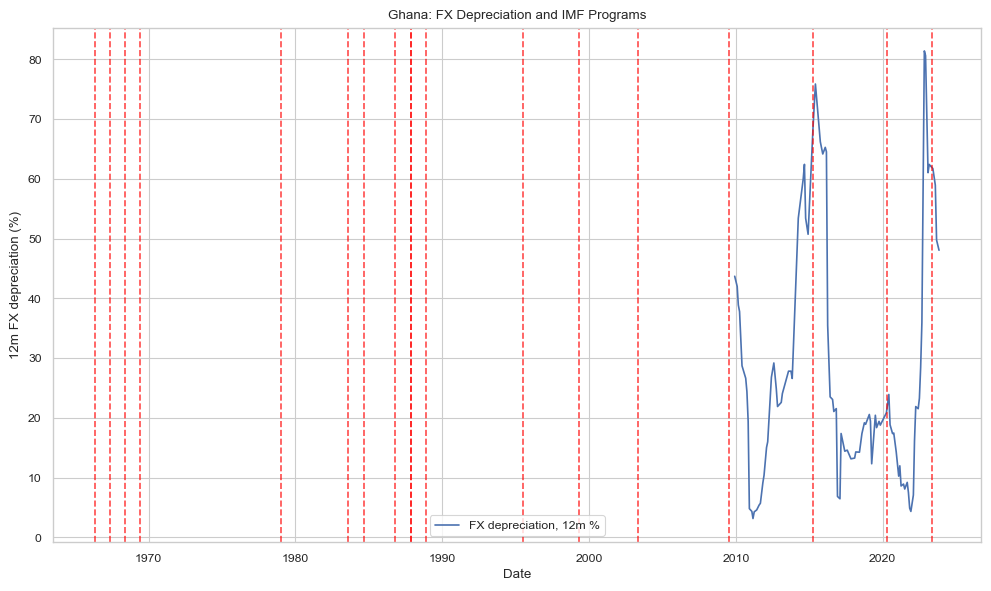

In [236]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df["fx_dep_12m"], label="FX depreciation, 12m %")

for d in imf.index:
    ax.axvline(d, color="red", linestyle="--", alpha=0.7)

ax.set_title("Ghana: FX Depreciation and IMF Programs")
ax.set_xlabel("Date")
ax.set_ylabel("12m FX depreciation (%)")
ax.legend()
plt.tight_layout()
plt.savefig("../figures/analysis/FXDepreciationAndIMFPrograms.png")
plt.show()


In [234]:
df["imf_window"] = 0
for d in imf.index:
    df.loc[(df.index >= d - pd.DateOffset(months=12)) &
           (df.index <= d + pd.DateOffset(months=12)), "imf_window"] = 1

In [235]:
df.groupby("imf_window")["fx_dep_12m"].mean()

imf_window
0    16.105979
1    41.895546
Name: fx_dep_12m, dtype: float64

## Interpretation
- Periods around IMF programs are crisis FX Regimes: The Cedi is on average losing 40% of its value vs USD over 12 months, compared to around 16% in non-program periods. IMF arrangements seem to be triggered when external pressures and currency depreciation are already super severe.